In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import math
from collections import Counter

Total gambar yang di-load: 300
Kategori: ['nantu', 'palapi', 'uru']


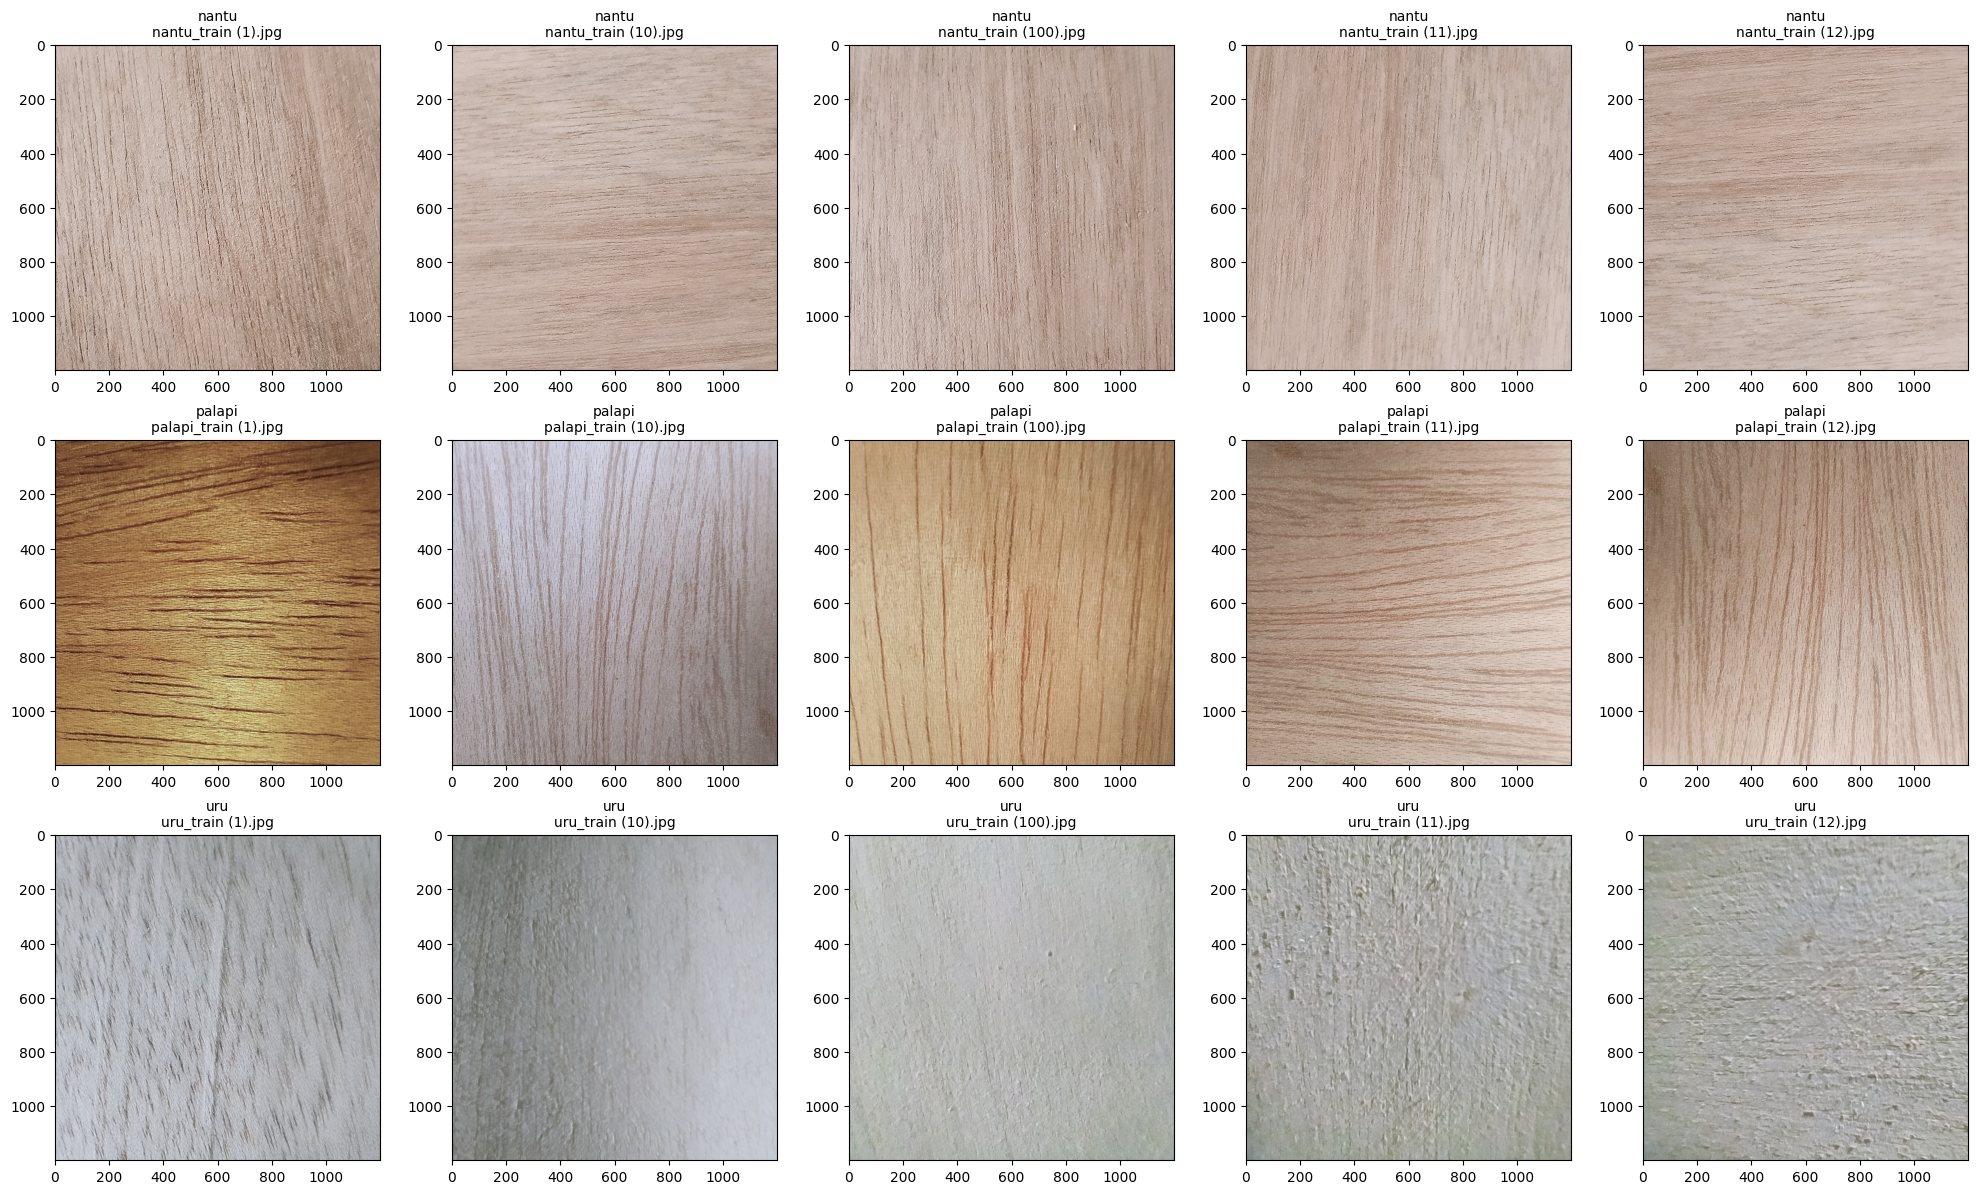

In [3]:
# Direktori dataset
dataset_path = 'serat_kayu'
categories = ['nantu', 'palapi', 'uru']

# Inisialisasi list untuk data, label, dan nama file
data = []
labels = []
file_names = []

# Loop melalui setiap kategori
for label, category in enumerate(categories):
    folder_path = os.path.join(dataset_path, category)
    
    # Loop melalui setiap file dalam folder
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        
        # Baca gambar menggunakan OpenCV
        image = cv2.imread(file_path)
        
        # Konversi dari BGR ke RGB (karena OpenCV membaca sebagai BGR)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Tambahkan ke list
        data.append(image_rgb)
        labels.append(label)
        file_names.append(file_name)


# Menampilkan informasi dataset
print(f"Total gambar yang di-load: {len(data)}")
print(f"Kategori: {categories}")

# Menampilkan 5 sampel gambar per label
def show_samples_per_class(n_samples=5):
    plt.figure(figsize=(4 * n_samples, 4 * len(categories)))
    labels_arr = np.array(labels)
    for i, category in enumerate(categories):
        # Cari indeks untuk kelas ini
        idxs = np.where(labels_arr == i)[0][:n_samples]
        for j, idx in enumerate(idxs):
            plt.subplot(len(categories), n_samples, i * n_samples + j + 1)
            plt.imshow(data[idx])
            plt.title(f"{category}\n{file_names[idx]}", fontsize=10)

    plt.tight_layout()
    plt.show()

show_samples_per_class(n_samples=5)

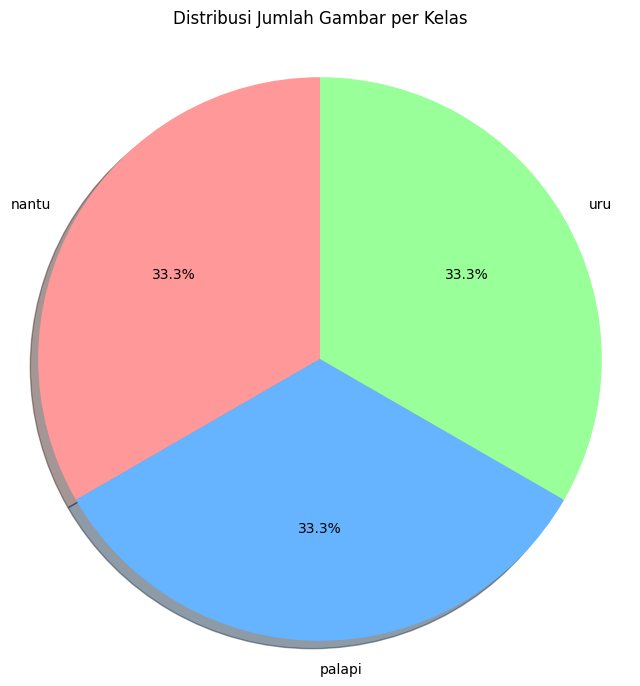


ANALISIS UKURAN GAMBAR:

NANTU:
  Resolusi rata-rata: [1200 1200] (P x L)
  Ukuran minimum: [1200 1200]
  Ukuran maksimum: [1200 1200]

PALAPI:
  Resolusi rata-rata: [1200 1200] (P x L)
  Ukuran minimum: [1200 1200]
  Ukuran maksimum: [1200 1200]

URU:
  Resolusi rata-rata: [1200 1200] (P x L)
  Ukuran minimum: [1200 1200]
  Ukuran maksimum: [1200 1200]


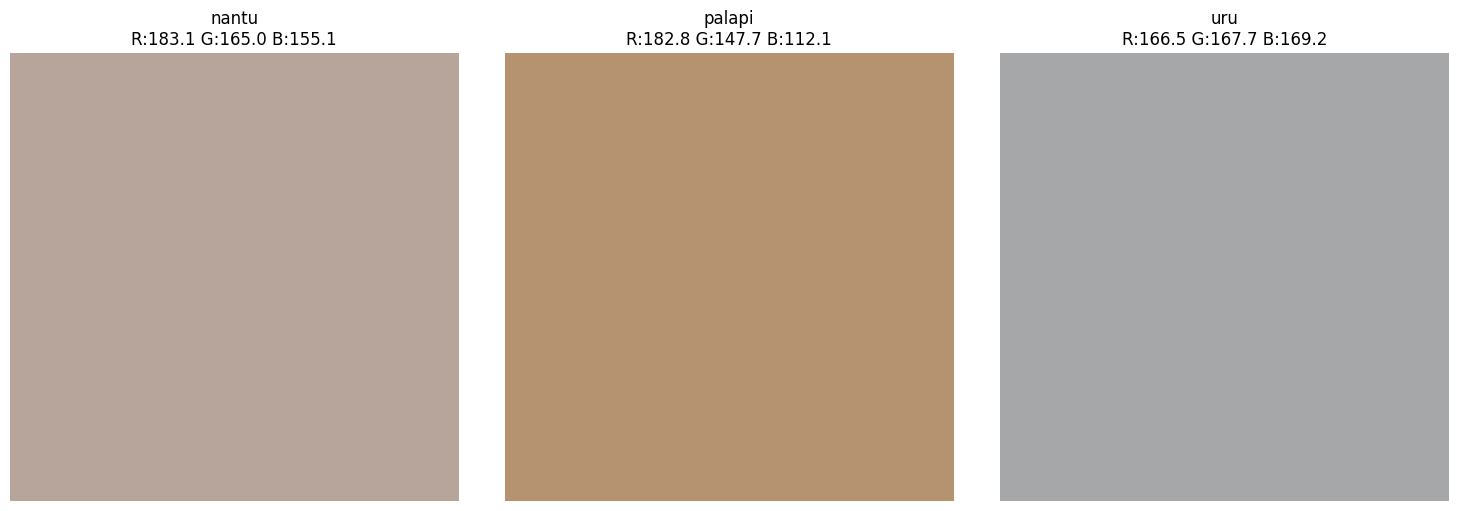

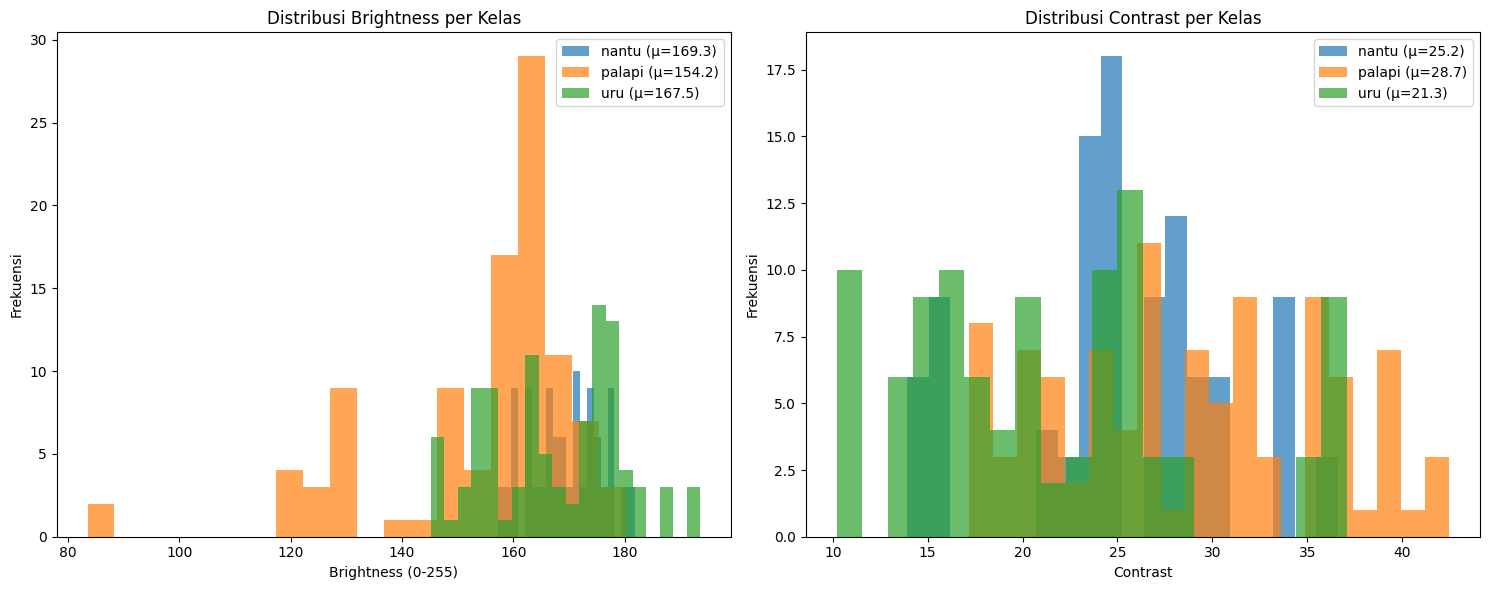

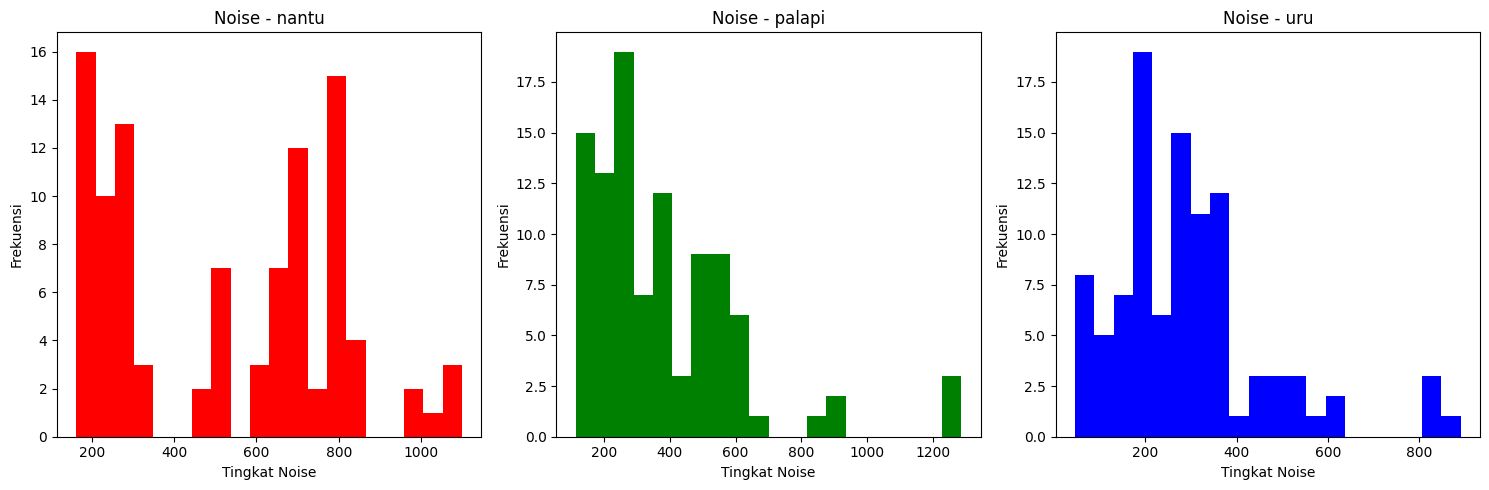


ANALISIS STATISTIK PER KELAS:

NANTU:
  Jumlah Sample: 100
  Warna Rata-rata - R:183.1 G:165.0 B:155.1
  Brightness - μ:169.3 σ:6.4
  Contrast - μ:25.2 σ:5.5
  Noise - μ:520.3 σ:273.0

PALAPI:
  Jumlah Sample: 100
  Warna Rata-rata - R:182.8 G:147.7 B:112.1
  Brightness - μ:154.2 σ:17.9
  Contrast - μ:28.7 σ:7.0
  Noise - μ:379.8 σ:239.2

URU:
  Jumlah Sample: 100
  Warna Rata-rata - R:166.5 G:167.7 B:169.2
  Brightness - μ:167.5 σ:12.0
  Contrast - μ:21.3 σ:7.5
  Noise - μ:293.9 σ:168.9


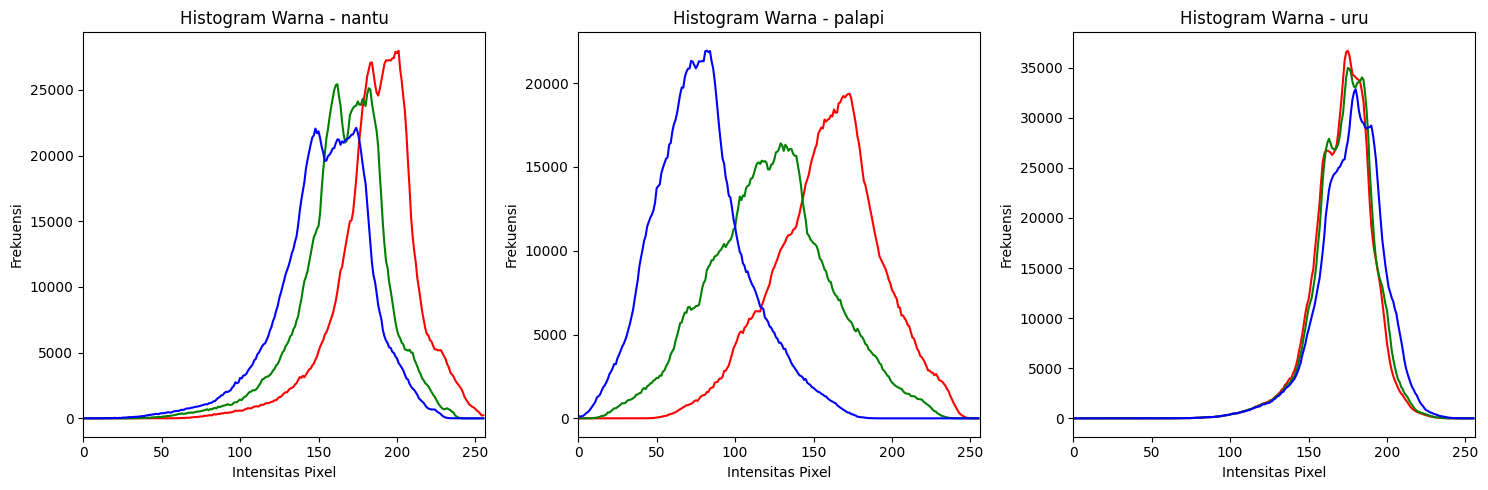

In [4]:
# ANALISIS DISTRIBUSI DATA (PIE CHART)

unique_labels, counts = np.unique(labels, return_counts=True)

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=categories, autopct='%1.1f%%', 
        colors=['#ff9999','#66b3ff','#99ff99'],
        startangle=90, shadow=True)
plt.title('Distribusi Jumlah Gambar per Kelas', pad=20)
plt.axis('equal')
plt.show()


# ANALISIS RATA-RATA WARNA (3 BERJEJER)

def display_average_colors(color_means, labels_arr, categories):
    plt.figure(figsize=(15, 5))
    color_means = np.array(color_means)
    
    for i, class_name in enumerate(categories):
        class_color_means = color_means[labels_arr == i]
        avg_rgb = np.mean(class_color_means, axis=0)
        
        plt.subplot(1, 3, i+1)
        avg_color = np.zeros((100, 100, 3), dtype=np.uint8)
        avg_color[:, :, :] = avg_rgb
        plt.imshow(avg_color)
        plt.title(f'{class_name.upper()}\nR: {avg_rgb[0]:.1f} - G: {avg_rgb[1]:.1f} - B: {avg_rgb[2]:.1f}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()


# ANALISIS UKURAN GAMBAR

def analyze_image_sizes(images, labels_arr, categories):
    shapes = np.array([img.shape[:2] for img in images])
    
    # Info numerik
    print("\nANALISIS UKURAN GAMBAR:")
    print("=======================")
    for i, class_name in enumerate(categories):
        class_shapes = shapes[labels_arr == i]
        print(f"\n{class_name.upper()}:")
        print(f"  Resolusi rata-rata: {np.mean(class_shapes, axis=0).astype(int)} (P x L)")
        print(f"  Ukuran minimum: {np.min(class_shapes, axis=0)}")
        print(f"  Ukuran maksimum: {np.max(class_shapes, axis=0)}")

labels_arr = np.array(labels)
analyze_image_sizes(data, labels_arr, categories)

# ANALISIS KARAKTERISTIK VISUAL

def analyze_image_properties(images, labels_arr, categories):
    brightness_values = []
    contrast_values = []
    color_means = []
    
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        brightness_values.append(np.mean(gray))
        contrast_values.append(np.std(gray))
        color_means.append(np.mean(img, axis=(0,1)))
    
    brightness_values = np.array(brightness_values)
    contrast_values = np.array(contrast_values)
    color_means = np.array(color_means)
    
    labels_arr = np.array(labels_arr)
    
    
    # ANALISIS RATA-RATA WARNA PER LABEL
    
    plt.figure(figsize=(15, 5))
    for i, class_name in enumerate(categories):
        class_indices = np.where(labels_arr == i)[0]
        class_color_means = color_means[class_indices]
        avg_rgb = np.mean(class_color_means, axis=0)
        
        plt.subplot(1, 3, i+1)
        avg_color = np.zeros((100, 100, 3), dtype=np.uint8)
        avg_color[:, :, :] = avg_rgb
        plt.imshow(avg_color)
        plt.title(f'{class_name}\nR:{avg_rgb[0]:.1f} G:{avg_rgb[1]:.1f} B:{avg_rgb[2]:.1f}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    
    # ANALISIS BRIGHTNESS DAN CONTRAST
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Brightness
    for i, class_name in enumerate(categories):
        class_indices = np.where(labels_arr == i)[0]
        ax1.hist(brightness_values[class_indices], bins=20, alpha=0.7, 
                label=f'{class_name} (μ={np.mean(brightness_values[class_indices]):.1f})')
    ax1.set_title('Distribusi Brightness per Kelas')
    ax1.set_xlabel('Brightness (0-255)')
    ax1.set_ylabel('Frekuensi')
    ax1.legend()
    
    # Contrast
    for i, class_name in enumerate(categories):
        class_indices = np.where(labels_arr == i)[0]
        ax2.hist(contrast_values[class_indices], bins=20, alpha=0.7,
                label=f'{class_name} (μ={np.mean(contrast_values[class_indices]):.1f})')
    ax2.set_title('Distribusi Contrast per Kelas')
    ax2.set_xlabel('Contrast')
    ax2.set_ylabel('Frekuensi')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    
    # ANALISIS NOISE PER LABEL
    
    plt.figure(figsize=(15, 5))
    for i, class_name in enumerate(categories):
        class_indices = np.where(labels_arr == i)[0]
        noise_levels = []
        
        for idx in class_indices:
            gray = cv2.cvtColor(images[idx], cv2.COLOR_RGB2GRAY)
            noise = cv2.Laplacian(gray, cv2.CV_64F).var()
            noise_levels.append(noise)
        
        plt.subplot(1, 3, i+1)
        plt.hist(noise_levels, bins=20, color=['red','green','blue'][i])
        plt.title(f'Noise - {class_name}')
        plt.xlabel('Tingkat Noise')
        plt.ylabel('Frekuensi')
    
    plt.tight_layout()
    plt.show()
    
    
    # STATISTIKNYA
    
    print("\nANALISIS STATISTIK PER KELAS:")
    print("============================")
    for i, class_name in enumerate(categories):
        class_indices = np.where(labels_arr == i)[0]
        
        # Calculate properties
        class_brightness = brightness_values[class_indices]
        class_contrast = contrast_values[class_indices]
        class_colors = color_means[class_indices]
        
        # Calculate noise
        noise_levels = []
        for idx in class_indices:
            gray = cv2.cvtColor(images[idx], cv2.COLOR_RGB2GRAY)
            noise_levels.append(cv2.Laplacian(gray, cv2.CV_64F).var())
        
        print(f"\n{class_name.upper()}:")
        print(f"  Jumlah Sample: {len(class_indices)}")
        print(f"  Warna Rata-rata - R:{np.mean(class_colors[:,0]):.1f} G:{np.mean(class_colors[:,1]):.1f} B:{np.mean(class_colors[:,2]):.1f}")
        print(f"  Brightness - μ:{np.mean(class_brightness):.1f} σ:{np.std(class_brightness):.1f}")
        print(f"  Contrast - μ:{np.mean(class_contrast):.1f} σ:{np.std(class_contrast):.1f}")
        print(f"  Noise - μ:{np.mean(noise_levels):.1f} σ:{np.std(noise_levels):.1f}")

analyze_image_properties(data, labels_arr, categories)

# ANALISIS HISTOGRAM WARNA

def analyze_color_histograms(images, labels_arr, categories):
    plt.figure(figsize=(15, 5))
    
    for i, class_name in enumerate(categories):
        class_images = [img for img, label in zip(images, labels_arr) if label == i]
        if not class_images:
            continue
        sample_img = class_images[0]
        
        plt.subplot(1, 3, i+1)
        for j, color in enumerate(['red', 'green', 'blue']):
            hist = cv2.calcHist([sample_img], [j], None, [256], [0, 256])
            plt.plot(hist, color=color)
            plt.xlim([0, 256])
        
        plt.title(f'Histogram Warna - {class_name}')
        plt.xlabel('Intensitas Pixel')
        plt.ylabel('Frekuensi')
    
    plt.tight_layout()
    plt.show()

analyze_color_histograms(data, labels_arr, categories)

In [5]:
# 1. Fungsi untuk menghitung GLCM manual
def calculate_glcm(image, distances, angles, levels=256):
    """
    Menghitung Gray-Level Co-occurrence Matrix (GLCM) secara manual
    
    Parameters:
        image: Gambar input (2D numpy array)
        distances: List jarak pixel (misal [1, 2, 3])
        angles: List sudut dalam radian (misal [0, np.pi/4, np.pi/2, 3*np.pi/4])
        levels: Jumlah level intensitas (default 256)
    
    Returns:
        Dictionary dengan key (distance, angle) dan value GLCM matrix
    """
    glcm_results = {}
    height, width = image.shape
    
    for d in distances:
        for angle in angles:
            # Inisialisasi matrix GLCM
            glcm = np.zeros((levels, levels), dtype=np.uint32)
            
            # Hitung offset berdasarkan angle
            if angle == 0:  # 0°
                dx, dy = d, 0
            elif angle == np.pi/4:  # 45°
                dx, dy = d, -d
            elif angle == np.pi/2:  # 90°
                dx, dy = 0, -d
            elif angle == 3*np.pi/4:  # 135°
                dx, dy = -d, -d
            else:
                raise ValueError("Angle not supported")
            
            # Bangun GLCM
            for i in range(height):
                for j in range(width):
                    # Cek boundary
                    if 0 <= i + dx < height and 0 <= j + dy < width:
                        pixel_val = image[i, j]
                        neighbor_val = image[i + dx, j + dy]
                        glcm[pixel_val, neighbor_val] += 1
            
            # Normalisasi GLCM
            glcm = glcm.astype(np.float32)
            if glcm.sum() > 0:
                glcm /= glcm.sum()
            
            glcm_results[(d, angle)] = glcm
    
    return glcm_results

# 2. Fungsi untuk menghitung fitur tekstur dari GLCM
def compute_texture_features(glcm_matrix):
    """
    Menghitung berbagai fitur tekstur dari GLCM
    
    Parameters:
        glcm_matrix: Matrix GLCM yang sudah dinormalisasi
    
    Returns:
        Dictionary berisi fitur-fitur tekstur
    """
    features = {}
    levels = glcm_matrix.shape[0]
    
    # Inisialisasi array untuk perhitungan
    i, j = np.indices((levels, levels))
    
    # 1. Contrast
    contrast = np.sum(glcm_matrix * (i - j)**2)
    features['contrast'] = contrast
    
    # 2. Dissimilarity
    dissimilarity = np.sum(glcm_matrix * np.abs(i - j))
    features['dissimilarity'] = dissimilarity
    
    # 3. Homogeneity
    homogeneity = np.sum(glcm_matrix / (1 + (i - j)**2))
    features['homogeneity'] = homogeneity
    
    # 4. Energy (ASM)
    asm = np.sum(glcm_matrix**2)
    features['energy'] = np.sqrt(asm)
    
    # 5. Entropy
    entropy = -np.sum(glcm_matrix * np.log(glcm_matrix + (glcm_matrix == 0)))
    features['entropy'] = entropy
    
    # 6. Correlation
    # Hitung mean dan std dev
    mean_i = np.sum(i * glcm_matrix)
    mean_j = np.sum(j * glcm_matrix)
    
    std_i = np.sqrt(np.sum((i - mean_i)**2 * glcm_matrix))
    std_j = np.sqrt(np.sum((j - mean_j)**2 * glcm_matrix))
    
    if std_i > 0 and std_j > 0:
        correlation = np.sum(glcm_matrix * (i - mean_i) * (j - mean_j)) / (std_i * std_j)
    else:
        correlation = 0
    features['correlation'] = correlation
    
    return features

# 3. Fungsi ekstraksi fitur dari gambar
def extract_features(image, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4]):
    """
    Ekstraksi fitur GLCM dari sebuah gambar
    
    Parameters:
        image: Gambar input (2D numpy array)
        distances: List jarak pixel
        angles: List sudut dalam radian
    
    Returns:
        Dictionary berisi semua fitur untuk semua kombinasi distance dan angle
    """
    # Hitung GLCM
    glcm_dict = calculate_glcm(image, distances, angles)
    
    # Hitung fitur untuk setiap GLCM
    all_features = {}
    for (d, angle), glcm in glcm_dict.items():
        angle_deg = int(np.degrees(angle))
        prefix = f"d{d}_a{angle_deg}"
        
        features = compute_texture_features(glcm)
        for name, value in features.items():
            all_features[f"{prefix}_{name}"] = value
    
    return all_features

# 4. Fungsi seleksi fitur
def select_features(feature_list, variance_threshold=0.01):
    """
    Seleksi fitur berdasarkan variance threshold
    
    Parameters:
        feature_list: List of dictionaries (fitur untuk setiap sampel)
        variance_threshold: Threshold variance untuk seleksi
    
    Returns:
        selected_features: List nama fitur yang terpilih
        selected_indices: Indices fitur yang terpilih
    """
    # Konversi ke array numpy
    feature_names = list(feature_list[0].keys())
    num_samples = len(feature_list)
    num_features = len(feature_names)
    
    feature_matrix = np.zeros((num_samples, num_features))
    for i, sample in enumerate(feature_list):
        feature_matrix[i] = [sample[name] for name in feature_names]
    
    # Hitung variance setiap fitur
    variances = np.var(feature_matrix, axis=0)
    
    # Seleksi fitur
    selected_indices = np.where(variances > variance_threshold)[0]
    selected_features = [feature_names[i] for i in selected_indices]
    
    return selected_features, selected_indices

In [6]:
# 1. Konversi semua gambar ke grayscale
gray_images = []
for img in data:
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_images.append(gray)

# 2. Ekstraksi fitur untuk semua gambar
all_features = []
for i, img in enumerate(gray_images):
   #  print(f"Memproses gambar {i+1}/{len(gray_images)} - {file_names[i]}")
    features = extract_features(img, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4])
    all_features.append(features)

# 3. Seleksi fitur
selected_features, selected_indices = select_features(all_features, variance_threshold=0.01)
print("\nFitur yang terpilih:")
for i, feat in enumerate(selected_features):
    print(f"{i+1}. {feat}")

# 4. Analisis fitur per kategori
print("\nAnalisis fitur per kategori:")
category_features = {category: [] for category in categories}

for i, features in enumerate(all_features):
    category = categories[labels[i]]
    # Hanya ambil fitur yang terpilih
    filtered_features = {feat: features[feat] for feat in selected_features}
    category_features[category].append(filtered_features)

# 5. Hitung statistik fitur per kategori
for category in categories:
    print(f"\nKategori: {category}")
    print(f"Jumlah sampel: {len(category_features[category])}")
    
    if len(category_features[category]) > 0:
        # Hitung rata-rata setiap fitur
        avg_features = {}
        for feat in selected_features:
            values = [sample[feat] for sample in category_features[category]]
            avg = sum(values) / len(values)
            avg_features[feat] = avg
        
        # Urutkan fitur berdasarkan nilai rata-rata
        sorted_features = sorted(avg_features.items(), key=lambda x: x[1], reverse=True)
        
        # Tampilkan 5 fitur paling khas
        print("5 fitur paling khas:")
        for feat, val in sorted_features[:5]:
            print(f"{feat}: {val:.4f}")


Fitur yang terpilih:
1. d1_a0_contrast
2. d1_a0_dissimilarity
3. d1_a0_entropy
4. d1_a45_contrast
5. d1_a45_dissimilarity
6. d1_a45_entropy
7. d1_a90_contrast
8. d1_a90_dissimilarity
9. d1_a90_entropy
10. d1_a135_contrast
11. d1_a135_dissimilarity
12. d1_a135_entropy

Analisis fitur per kategori:

Kategori: nantu
Jumlah sampel: 100
5 fitur paling khas:
d1_a45_contrast: 248.8435
d1_a135_contrast: 243.5214
d1_a90_contrast: 156.6282
d1_a0_contrast: 119.7042
d1_a45_dissimilarity: 9.5284

Kategori: palapi
Jumlah sampel: 100
5 fitur paling khas:
d1_a135_contrast: 187.1026
d1_a45_contrast: 186.8572
d1_a90_contrast: 124.2464
d1_a0_contrast: 83.9735
d1_a45_dissimilarity: 8.7955

Kategori: uru
Jumlah sampel: 100
5 fitur paling khas:
d1_a45_contrast: 131.8511
d1_a135_contrast: 120.7979
d1_a90_contrast: 83.5245
d1_a0_contrast: 62.5396
d1_a45_entropy: 7.9178


In [7]:
import numpy as np

def manual_train_test_split(X, y, test_size=0.2, random_state=42):
    """
    Manual train-test split yang mempertahankan distribusi kelas
    
    Parameters:
        X: Matriks fitur (n_samples, n_features)
        y: Label (n_samples,)
        test_size: Proporsi data test (default 0.2)
        random_state: Seed untuk reproducibility
        
    Returns:
        X_train, X_test, y_train, y_test
    """
    if random_state is not None:
        np.random.seed(random_state)
    
    # Dapatkan kelas unik
    classes = np.unique(y)
    X_train, X_test, y_train, y_test = [], [], [], []
    
    for cls in classes:
        # Dapatkan indeks untuk kelas saat ini
        cls_indices = np.where(y == cls)[0]
        
        # Acak indeks
        np.random.shuffle(cls_indices)
        
        # Hitung titik split
        split_idx = int(len(cls_indices) * (1 - test_size))
        
        # Split untuk kelas ini
        X_train.extend(X[cls_indices[:split_idx]])
        X_test.extend(X[cls_indices[split_idx:]])
        y_train.extend(y[cls_indices[:split_idx]])
        y_test.extend(y[cls_indices[split_idx:]])
    
    # Konversi ke numpy array
    return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

# Ekstraksi fitur untuk semua gambar
all_features = []
for i, img in enumerate(gray_images):
    features = extract_features(img, distances=[1], angles=[0, np.pi/4, np.pi/2, 3*np.pi/4])
    all_features.append(features)

# Seleksi fitur
selected_features, selected_indices = select_features(all_features, variance_threshold=0.01)

# Siapkan matriks fitur X dan label y
X = np.array([[sample[feat] for feat in selected_features] for sample in all_features])
y = np.array(labels)  # Label dari data awal

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = manual_train_test_split(X, y, test_size=0.2, random_state=42)

# Analisis hasil split
print("\n=== Hasil Train-Test Split ===")
print(f"Total samples: {len(X)}")
print(f"Training set: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")

print("\nDistribusi kelas di training set:")
for cls in np.unique(y_train):
    count = np.sum(y_train == cls)
    print(f"{categories[cls]}: {count} samples ({count/len(y_train)*100:.1f}%)")

print("\nDistribusi kelas di test set:")
for cls in np.unique(y_test):
    count = np.sum(y_test == cls)
    print(f"{categories[cls]}: {count} samples ({count/len(y_test)*100:.1f}%)")

# Simpan hasil split untuk penggunaan selanjutnya
split_data = {
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test,
    'feature_names': selected_features,
    'class_names': categories
}


=== Hasil Train-Test Split ===
Total samples: 300
Training set: 240 samples (80.0%)
Test set: 60 samples (20.0%)

Distribusi kelas di training set:
nantu: 80 samples (33.3%)
palapi: 80 samples (33.3%)
uru: 80 samples (33.3%)

Distribusi kelas di test set:
nantu: 20 samples (33.3%)
palapi: 20 samples (33.3%)
uru: 20 samples (33.3%)


In [8]:
import numpy as np
import math
from collections import Counter

# ======================== EVALUATION METRICS ========================
def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    return correct / len(y_true)

def precision(y_true, y_pred, class_id):
    true_pos = np.sum((y_true == class_id) & (y_pred == class_id))
    pred_pos = np.sum(y_pred == class_id)
    return true_pos / pred_pos if pred_pos > 0 else 0

def recall(y_true, y_pred, class_id):
    true_pos = np.sum((y_true == class_id) & (y_pred == class_id))
    actual_pos = np.sum(y_true == class_id)
    return true_pos / actual_pos if actual_pos > 0 else 0

def f1_score(y_true, y_pred, class_id):
    prec = precision(y_true, y_pred, class_id)
    rec = recall(y_true, y_pred, class_id)
    return 2 * (prec * rec) / (prec + rec) if (prec + rec) > 0 else 0

def evaluate(y_true, y_pred, classes):
    results = {}
    for cls in classes:
        results[cls] = {
            'precision': precision(y_true, y_pred, cls),
            'recall': recall(y_true, y_pred, cls),
            'f1': f1_score(y_true, y_pred, cls)
        }
    results['accuracy'] = accuracy(y_true, y_pred)
    return results

# ======================== KNN IMPLEMENTATION ========================
class KNN:
    def __init__(self, k=5, random_state=None):
        self.k = k
        self.random_state = random_state
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        if self.random_state is not None:
            np.random.seed(self.random_state)
        
    def predict(self, X_test):
        y_pred = []
        for test_sample in X_test:
            # Euclidean distance with stabilization for numerical precision
            distances = [np.sqrt(np.sum((train_sample - test_sample)**2) + 1e-10) 
                        for train_sample in self.X_train]
            # Stable sorting with secondary random key
            rng = np.random.RandomState(self.random_state)
            tie_breaker = rng.rand(len(distances))
            k_indices = np.lexsort((tie_breaker, distances))[:self.k]
            k_nearest_labels = self.y_train[k_indices]
            # Stable majority voting
            counts = Counter(k_nearest_labels)
            max_count = max(counts.values())
            candidates = [label for label, count in counts.items() if count == max_count]
            y_pred.append(rng.choice(candidates))
        return np.array(y_pred)

# ======================== SVM IMPLEMENTATION ========================
class SVM:
    def __init__(self, max_iter=1000, learning_rate=0.05, random_state=None):
        self.max_iter = max_iter
        self.lr = learning_rate
        self.random_state = random_state
        
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.classifiers = {}
        rng = np.random.RandomState(self.random_state)
        
        for cls in self.classes:
            # Convert to binary problem
            y_binary = np.where(y == cls, 1, -1)
            
            # Initialize weights with controlled randomness
            w = rng.normal(0, 0.01, X.shape[1])
            b = 0
            
            # SGD with stable shuffling
            indices = np.arange(X.shape[0])
            for _ in range(self.max_iter):
                rng.shuffle(indices)
                for i in indices:
                    condition = y_binary[i] * (np.dot(X[i], w) + b) >= 1
                    if not condition:
                        w += self.lr * (y_binary[i] * X[i])
                        b += self.lr * y_binary[i]
            
            self.classifiers[cls] = (w, b)
    
    def predict(self, X):
        rng = np.random.RandomState(self.random_state)
        y_pred = []
        for sample in X:
            scores = []
            for cls, (w, b) in self.classifiers.items():
                score = np.dot(sample, w) + b
                scores.append((score, cls))
            # Handle ties randomly but reproducibly
            max_score = max(scores)[0]
            candidates = [cls for score, cls in scores if score == max_score]
            y_pred.append(rng.choice(candidates))
        return np.array(y_pred)

# ======================== RANDOM FOREST IMPLEMENTATION ========================
class DecisionTree:
    def __init__(self, max_depth=5, random_state=None):
        self.max_depth = max_depth
        self.random_state = random_state
        
    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)
        
    def _build_tree(self, X, y, depth):
        rng = np.random.RandomState(self.random_state)
        
        # Stopping criteria
        if len(set(y)) == 1 or depth >= self.max_depth:
            return Counter(y).most_common(1)[0][0]
        
        # Feature selection with randomness control
        best_feature, best_threshold = self._find_best_split(X, y, rng)
        if best_feature is None:
            return Counter(y).most_common(1)[0][0]
        
        # Split
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask
        
        # Recursion
        left_subtree = self._build_tree(X[left_mask], y[left_mask], depth+1)
        right_subtree = self._build_tree(X[right_mask], y[right_mask], depth+1)
        
        return (best_feature, best_threshold, left_subtree, right_subtree)
    
    def _find_best_split(self, X, y, rng):
        best_gini = float('inf')
        best_feature, best_threshold = None, None
        n_features = X.shape[1]
        
        # Random feature selection (optional for extra randomness control)
        features = rng.permutation(n_features)
        
        for feature in features:
            thresholds = np.unique(X[:, feature])
            if len(thresholds) > 10:  # Prevent too many splits
                thresholds = np.linspace(np.min(X[:, feature]), 
                                      np.max(X[:, feature]), 10)
            
            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                gini = self._calculate_gini(y[left_mask], y[~left_mask])
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold
                    
        return best_feature, best_threshold
    
    def _calculate_gini(self, left_y, right_y):
        n_left, n_right = len(left_y), len(right_y)
        n_total = n_left + n_right
        
        def _gini(y):
            counts = Counter(y)
            return 1 - sum((count/len(y))**2 for count in counts.values())
        
        return (n_left/n_total)*_gini(left_y) + (n_right/n_total)*_gini(right_y)
    
    def predict(self, X):
        return np.array([self._predict_tree(self.tree, sample) for sample in X])
    
    def _predict_tree(self, tree, sample):
        if not isinstance(tree, tuple):
            return tree
        
        feature, threshold, left, right = tree
        if sample[feature] <= threshold:
            return self._predict_tree(left, sample)
        else:
            return self._predict_tree(right, sample)

class RandomForest:
    def __init__(self, n_trees=10, max_depth=5, random_state=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.random_state = random_state
        
    def fit(self, X, y):
        self.trees = []
        rng = np.random.RandomState(self.random_state)
        
        for _ in range(self.n_trees):
            # Bootstrap sample with controlled randomness
            indices = rng.choice(len(X), len(X), replace=True)
            X_sample = X[indices]
            y_sample = y[indices]
            
            # Train tree
            tree = DecisionTree(max_depth=self.max_depth, 
                              random_state=rng.randint(0, 10000))
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
    
    def predict(self, X):
        rng = np.random.RandomState(self.random_state)
        predictions = np.array([tree.predict(X) for tree in self.trees])
        
        # Majority vote with tie-breaking
        final_pred = []
        for sample_pred in predictions.T:
            counts = Counter(sample_pred)
            max_count = max(counts.values())
            candidates = [label for label, count in counts.items() 
                         if count == max_count]
            final_pred.append(rng.choice(candidates))
            
        return np.array(final_pred)

# Contoh penggunaan:
# Asumsikan kita memiliki data X_train, X_test, y_train, y_test, dan categories

# Inisialisasi model dengan random_state tetap
models = {
    "KNN": KNN(k=5, random_state=42),
    "SVM": SVM(random_state=42),
    "Random Forest": RandomForest(random_state=42)
}

# Variabel untuk menyimpan hasil
all_results = []

# Melatih dan mengevaluasi setiap model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics = evaluate(y_test, y_pred, np.unique(y_test))
    
    # Menyimpan hasil untuk setiap kelas
    class_results = []
    for cls in np.unique(y_test):
        class_results.append({
            'Model': name,
            'Class': categories[cls],
            'Precision': metrics[cls]['precision'],
            'Recall': metrics[cls]['recall'],
            'F1-Score': metrics[cls]['f1']
        })
    
    # Menyimpan hasil akurasi overall
    overall_result = {
        'Model': name,
        'Class': 'Overall',
        'Accuracy': metrics['accuracy']
    }
    
    all_results.append({
        'class_results': class_results,
        'overall_result': overall_result
    })

# Hasil akhir tersimpan dalam variabel all_results
# all_results adalah list yang berisi dictionary untuk setiap model, dengan:
# - class_results: hasil evaluasi per kelas
# - overall_result: hasil akurasi overall

# Menampilkan classification report untuk masing-masing model
for result in all_results:
    print(f"Model: {result['class_results'][0]['Model']}")
    print("Class\t\tPrecision\tRecall\t\tF1-Score")
    for cls_res in result['class_results']:
        print(f"{cls_res['Class']}\t\t{cls_res['Precision']:.4f}\t\t{cls_res['Recall']:.4f}\t\t{cls_res['F1-Score']:.4f}")
    print(f"Overall Accuracy: {result['overall_result']['Accuracy']:.4f}")
    print("-" * 50)

Model: KNN
Class		Precision	Recall		F1-Score
nantu		0.5600		0.7000		0.6222
palapi		0.6250		0.5000		0.5556
uru		0.7368		0.7000		0.7179
Overall Accuracy: 0.6333
--------------------------------------------------
Model: SVM
Class		Precision	Recall		F1-Score
nantu		0.6667		0.1000		0.1739
palapi		1.0000		0.0500		0.0952
uru		0.3393		0.9500		0.5000
Overall Accuracy: 0.3667
--------------------------------------------------
Model: Random Forest
Class		Precision	Recall		F1-Score
nantu		1.0000		0.7000		0.8235
palapi		0.6190		0.6500		0.6341
uru		0.6400		0.8000		0.7111
Overall Accuracy: 0.7167
--------------------------------------------------


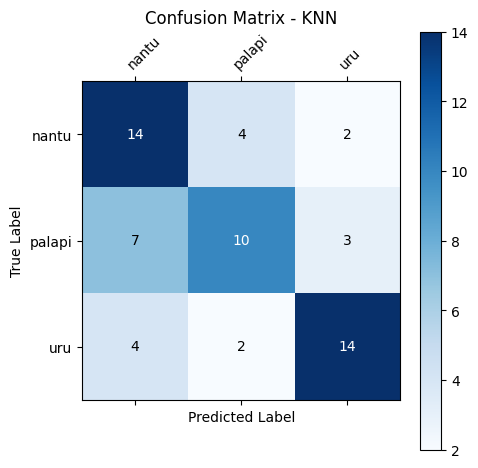

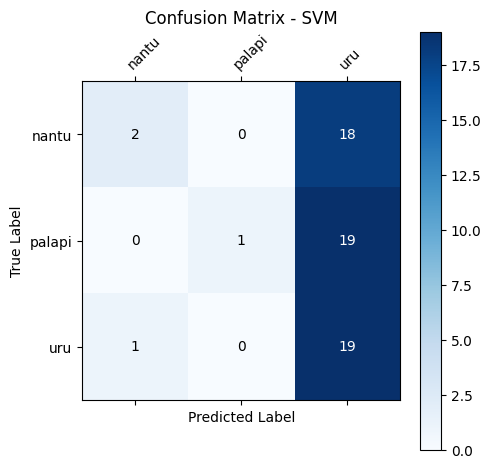

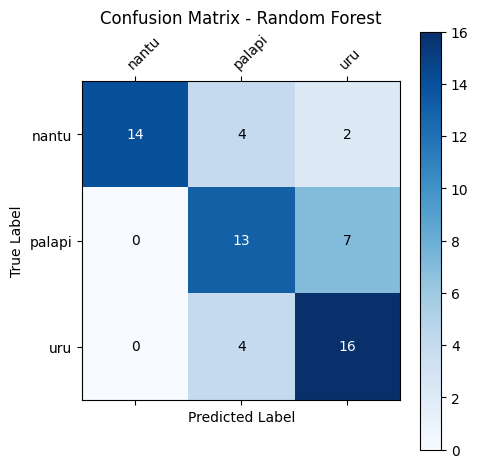

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(y_true, y_pred, classes, model_name):
    # Hitung confusion matrix
    n_classes = len(classes)
    cm = np.zeros((n_classes, n_classes), dtype=int)
    
    for true, pred in zip(y_true, y_pred):
        cm[true][pred] += 1
    
    # Plot matrix
    fig, ax = plt.subplots(figsize=(5, 5))
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    fig.colorbar(cax)
    
    # Atur ticks dan labels
    ax.set_xticks(np.arange(n_classes))
    ax.set_yticks(np.arange(n_classes))
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)
    
    # Rotasi label x
    plt.setp(ax.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor")
    
    # Tambahkan nilai di setiap sel
    for i in range(n_classes):
        for j in range(n_classes):
            ax.text(j, i, str(cm[i, j]), ha="center", va="center", color="white" if cm[i, j] > cm.max()/2 else "black")
    
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

# Contoh penggunaan:
# Asumsikan kita sudah memiliki y_test dan y_pred untuk setiap model
for name, model in models.items():
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, categories, name)